,Item Number,06/17/2023,06/24/2023,07/01/2023,07/08/2023,07/15/2023,07/22/2023,07/29/2023,08/05/2023,08/12/2023,08/19/2023,08/26/2023,09/02/2023,09/09/2023,09/16/2023,09/23/2023,09/30/2023,10/07/2023,10/14/2023,10/21/2023,10/28/2023,11/04/2023,11/11/2023,11/18/2023,11/25/2023,12/02/2023,12/09/2023,12/16/2023,12/23/2023
0,064-01-1347,3561.0,3561.0,3561.0,4561.0,10129.0,10129.0,10129.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0,11929.0
1,064-01-1361,4035.0,4035.0,4035.0,4659.0,11279.0,11279.0,11279.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0,13479.0
2,064-01-1375,2684.0,2684.0,2684.0,4264.0,6032.0,6032.0,6032.0,6032.0,6032.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0,9432.0
3,064-01-1385,5136.0,5136.0,5136.0,5832.0,11028.0,11028.0,11028.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0,13228.0
4,064-01-1399,6399.0,6399.0,6399.0,7299.0,15435.0,15435.0,15435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0,17435.0
5,064-01-1409,10135.0,10135.0,10135.0,10723.0,18759.0,18759.0,18759.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0,21059.0
6,064-01-1423,3309.0,3309.0,3309.0,3849.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0,6829.0
7,064-01-1430,2451.0,2451.0,2451.0,4471.0,7031.0,7031.0,7031.0,7031.0,7031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0,14031.0
8,064-01-1437,2056.0,2056.0,2056.0,2964.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0,4756.0
9,064-01-1444,5449.0,5449.0,5449.0,5449.0,11717.0,11717.0,11717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0,13717.0


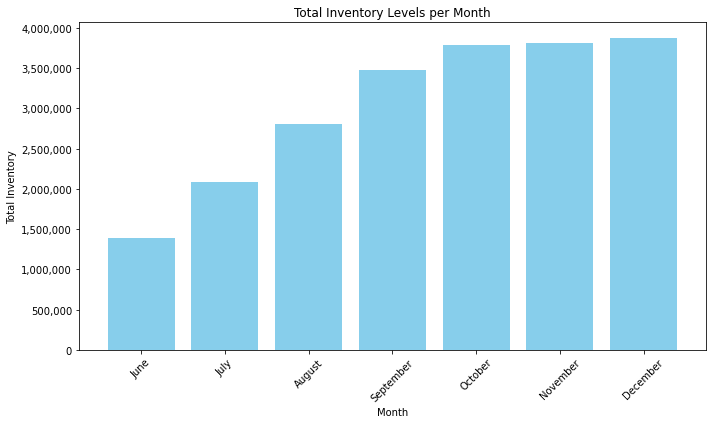

In [3]:
#importing all necessary libraries
import pandas as pd
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)
from datetime import datetime, timedelta
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt


# Load inventory data from Excel file
inventory_df = pd.read_excel('C:/Users/prith/Downloads/Inventory Dataset.xlsx')
new_inventory_df = pd.read_excel('C:/Users/prith/Downloads/New Inventory.xlsx')


# Merge datasets based on 'Item Number'
merged_df = pd.merge(inventory_df, new_inventory_df, on='Item Number', how='outer')
merged_df['Date'] = pd.to_datetime(merged_df['Date']).dt.strftime('%m/%d/%Y')
merged_df['Inventory Receive'] = pd.to_datetime(merged_df['Inventory Receive']).dt.strftime('%m/%d/%Y')
merged_df['Inventory'] = merged_df['Inventory'].fillna(0)
# print(merged_df)


#calculating inventory for weekly and monthly dates
def calculate_inventory_for_specific_dates(target_dates):
    result = pd.DataFrame(columns=['Item Number'] + [str(date) for date in target_dates])

    all_items = merged_df['Item Number'].unique()  # Get all unique item numbers

    for item_number in all_items:
        item_data = merged_df[merged_df['Item Number'] == item_number]
        inventory_for_dates = []

        for date in target_dates:
              date = pd.to_datetime(date).strftime('%m/%d/%Y')
              relevant_data = item_data[item_data['Inventory Receive'] <= date]
              if relevant_data.empty:
                  initial_inventory = item_data['Inventory'].iloc[0]
                  inventory_for_dates.append(initial_inventory)
              else:
                  item_inventory = relevant_data['Inventory'].iloc[-1] if not relevant_data.empty else 0
                  received_quantities = relevant_data['Total Item Qty'].fillna(0).sum()
                  inventory_for_date = item_inventory + received_quantities
                  inventory_for_dates.append(inventory_for_date)

        result.loc[len(result)] = [item_number] + inventory_for_dates
    return result


#function to generate all week dates
def generate_week_dates():
    start_date = datetime.strptime('06/17/2023', '%m/%d/%Y')
    end_date = datetime.strptime('12/23/2023', '%m/%d/%Y')

    dates = []
    current_date = start_date
    while current_date <= end_date:
        dates.append(current_date.strftime('%m/%d/%Y'))
        current_date += timedelta(weeks=1)

    return dates

specific_week_dates = generate_week_dates()
result_for_specific_week_dates = calculate_inventory_for_specific_dates(specific_week_dates)
display(result_for_specific_week_dates)


#function to generate all monthend dates
def generate_month_end_dates(start_date='06/17/2023', end_date='12/23/2023'):
    start_date = datetime.strptime(start_date, '%m/%d/%Y')
    end_date = datetime.strptime(end_date, '%m/%d/%Y')

    dates = []
    current_date = start_date.replace(day=1) + timedelta(days=32)
    current_date = current_date.replace(day=1) - timedelta(days=1)

    while current_date <= end_date or current_date.month == 12:
        dates.append(current_date.strftime('%m/%d/%Y'))
        current_date = current_date + timedelta(days=32)
        current_date = current_date.replace(day=1) - timedelta(days=1)

    return dates

specific_wmonth_end_dates = generate_month_end_dates()
result_for_specific_month_end_dates = calculate_inventory_for_specific_dates(specific_wmonth_end_dates)
# print(result_for_specific_month_end_dates)


#creating dataframe for monthly inventory levels
# Dropping 'Item Number' column
result_for_specific_month_end_dates_without_item = result_for_specific_month_end_dates.drop(columns='Item Number')

# Calculating the sum across rows for each date
total_inventory_per_date = result_for_specific_month_end_dates_without_item.sum()

# Creating a DataFrame with the total inventory per date
total_inventory_df = pd.DataFrame(total_inventory_per_date, columns=['Total Inventory'])
# print(total_inventory_df)

month_names = {
    '06/30/2023': 'June',
    '07/31/2023': 'July',
    '08/31/2023': 'August',
    '09/30/2023': 'September',
    '10/31/2023': 'October',
    '11/30/2023': 'November',
    '12/31/2023': 'December'
}

# Rename the index (dates) to month names
total_inventory_df.index = total_inventory_df.index.map(month_names)


# Plotting the bar chart for monthly inventory levels
plt.figure(figsize=(10, 6))
plt.bar(total_inventory_df.index, total_inventory_df['Total Inventory'], color='skyblue')
plt.title('Total Inventory Levels per Month')
plt.xlabel('Month')
plt.ylabel('Total Inventory')
plt.xticks(rotation=45)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()